In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_18',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_18',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03c_wn_720_800',
                          'ng_18',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_18',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_all1',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'crd_0f8bc9f',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 720

nband = 80

nv = 200

dv = 0.005

tsfc = 294.0

ng = 18

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 18 /)

data wgt
     &     /18*1/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 0

klin = 6.375563e-24

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

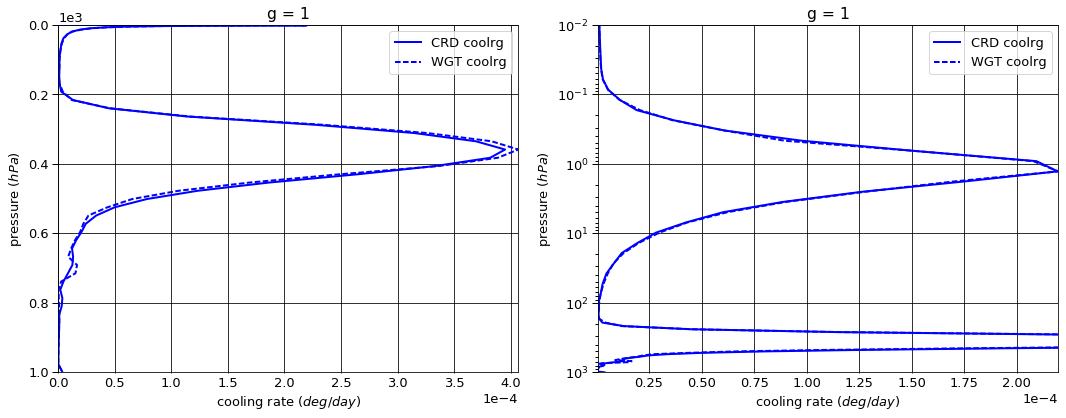

# Figure: cooling rate g-group 2

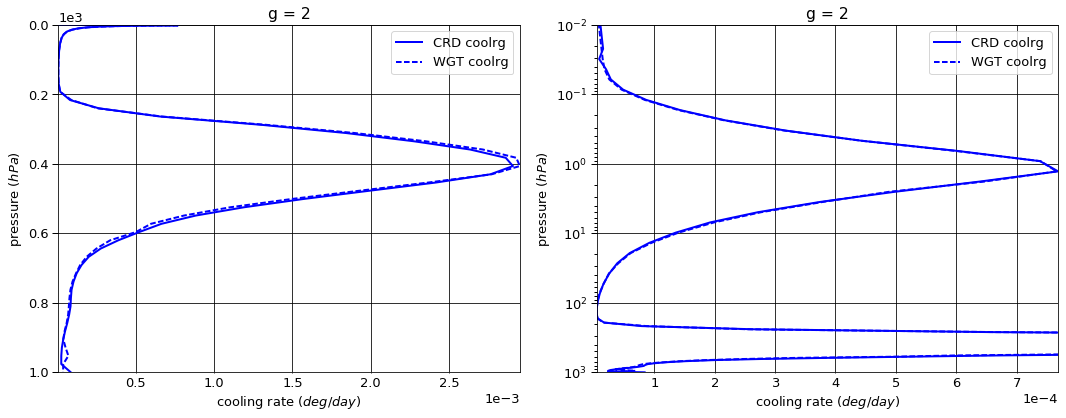

# Figure: cooling rate g-group 3

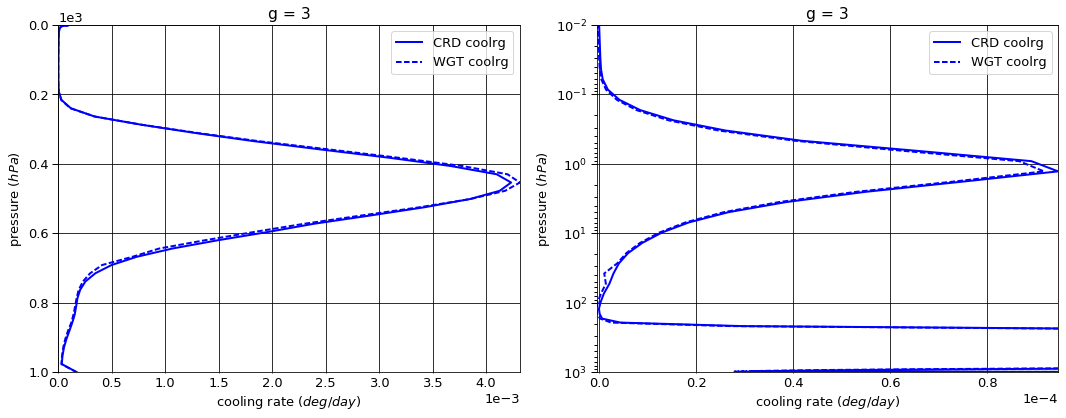

# Figure: cooling rate g-group 4

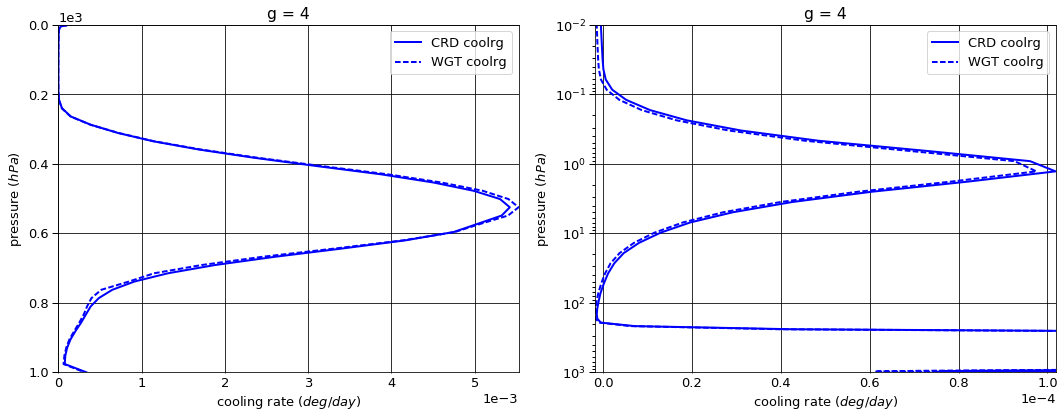

# Figure: cooling rate g-group 5

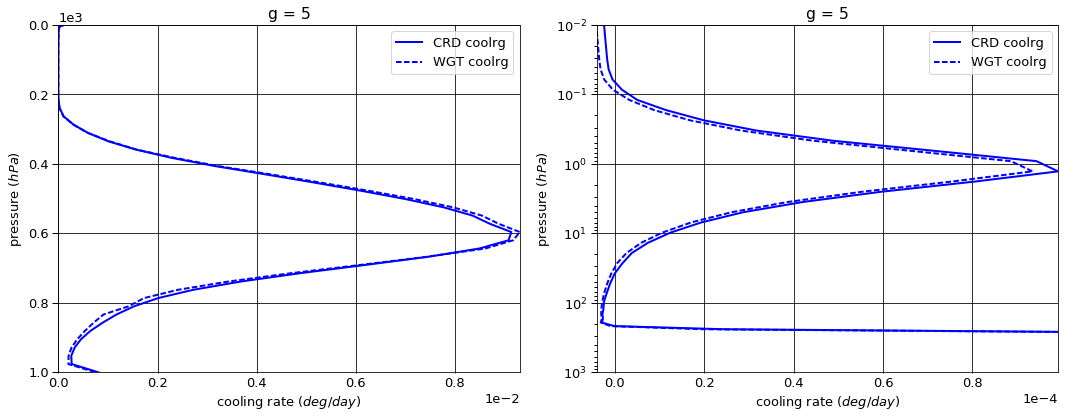

# Figure: cooling rate g-group 6

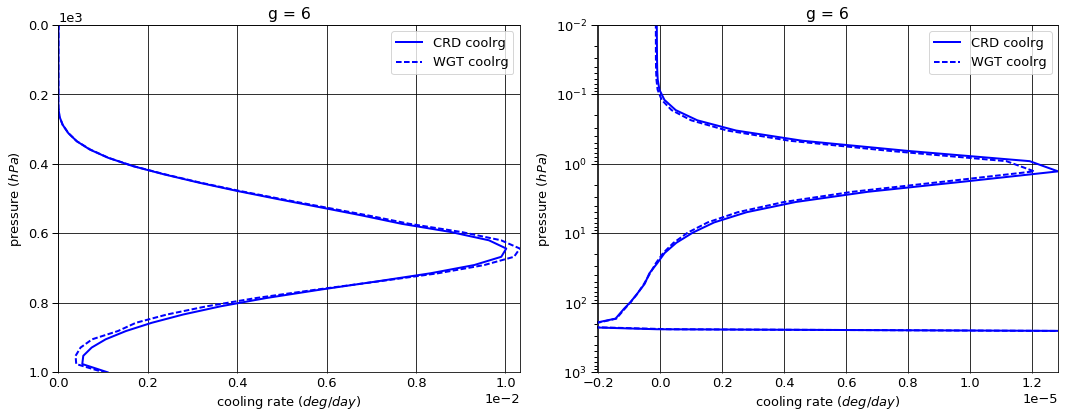

# Figure: cooling rate g-group 7

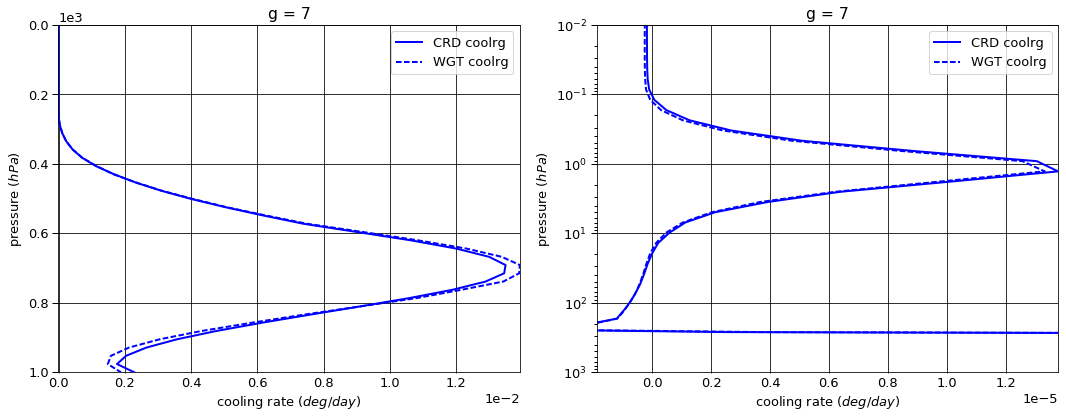

# Figure: cooling rate g-group 8

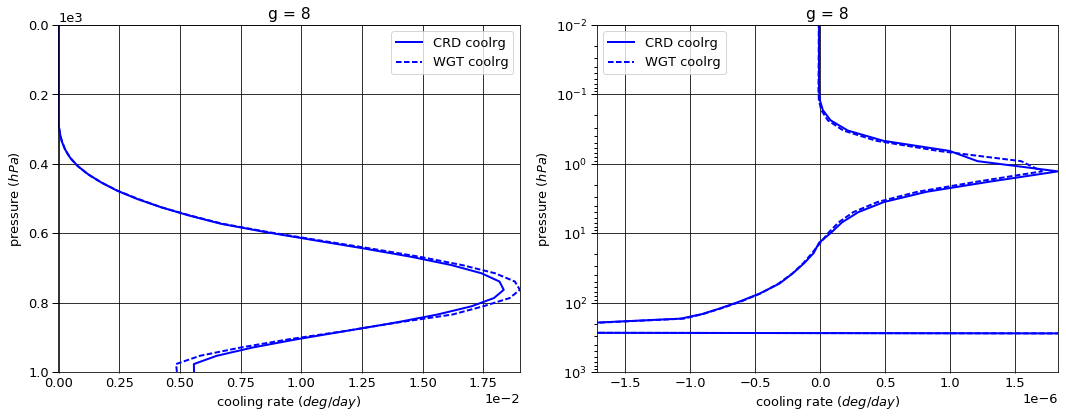

# Figure: cooling rate g-group 9

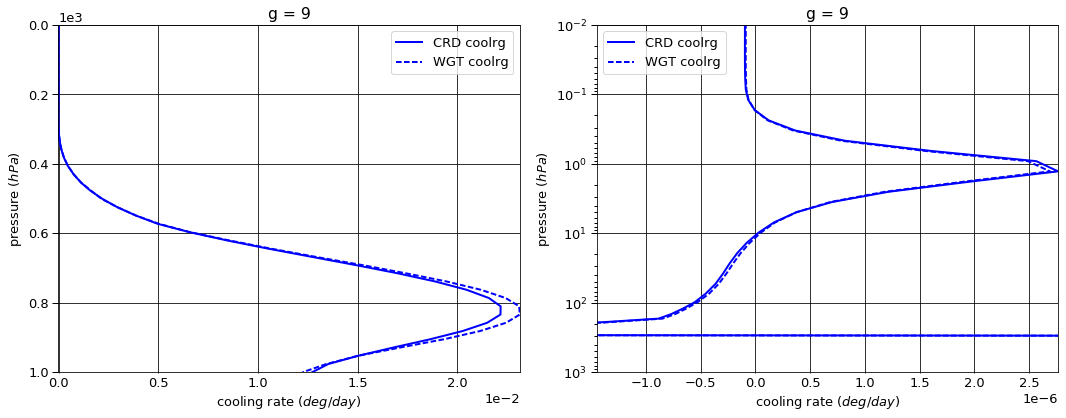

# Figure: cooling rate g-group 10

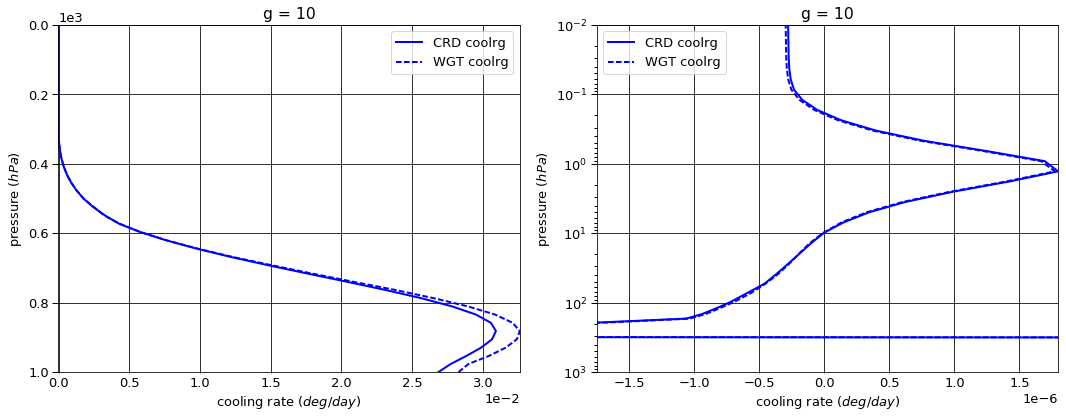

# Figure: cooling rate g-group 11

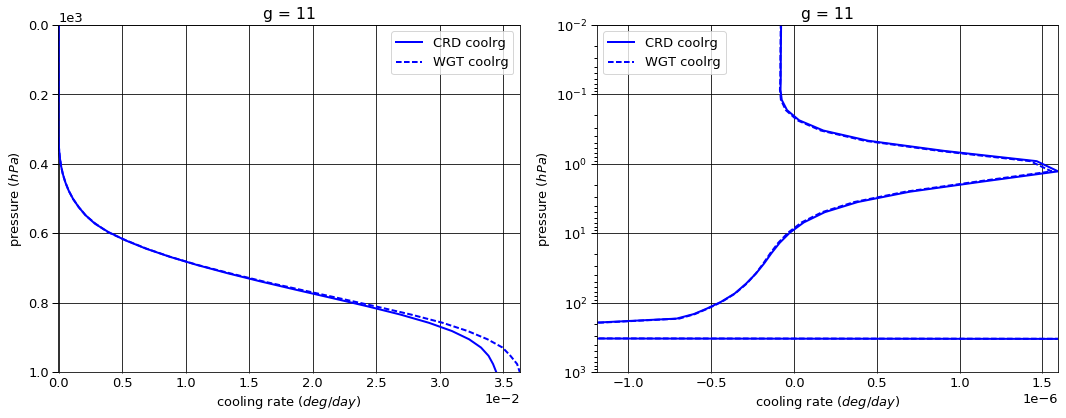

# Figure: cooling rate g-group 12

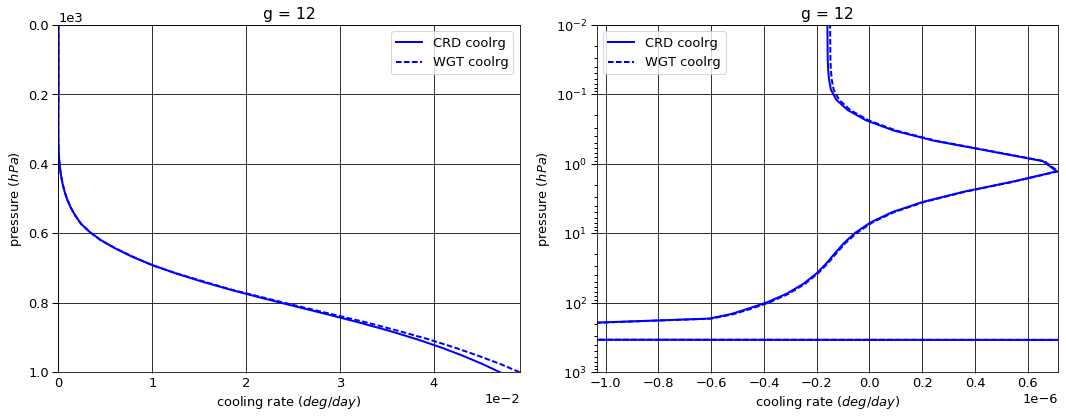

# Figure: cooling rate g-group 13

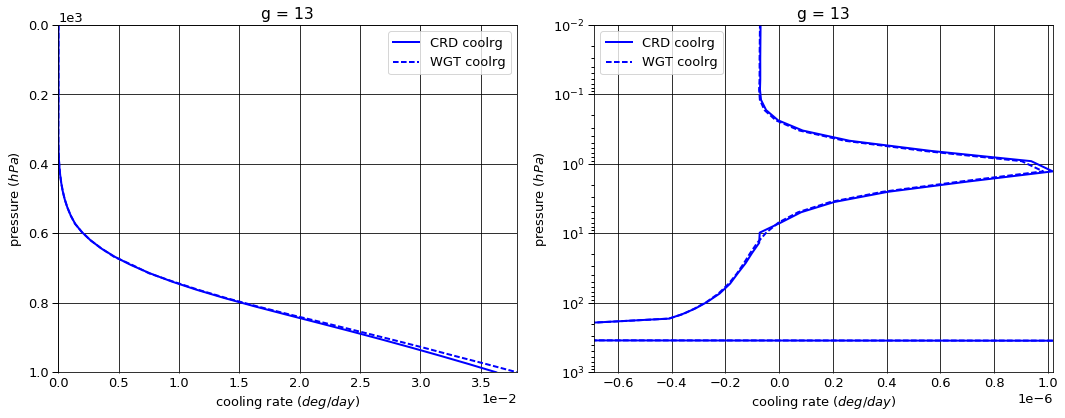

# Figure: cooling rate g-group 14

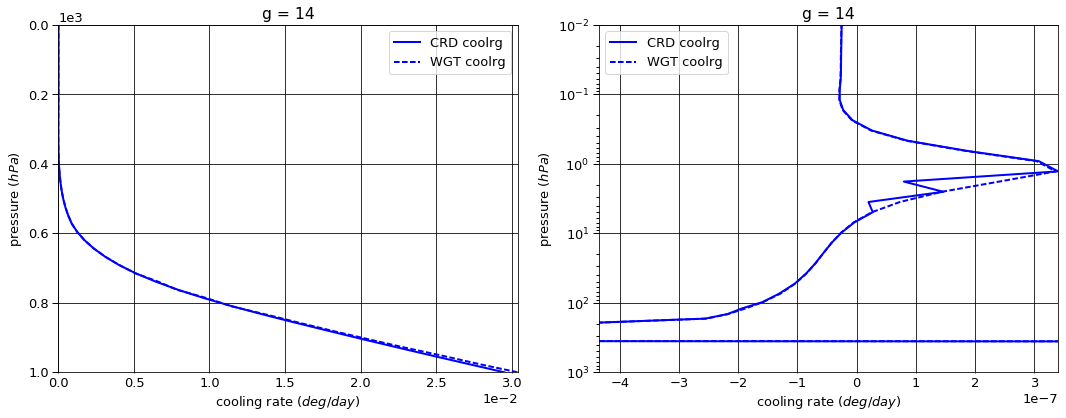

# Figure: cooling rate g-group 15

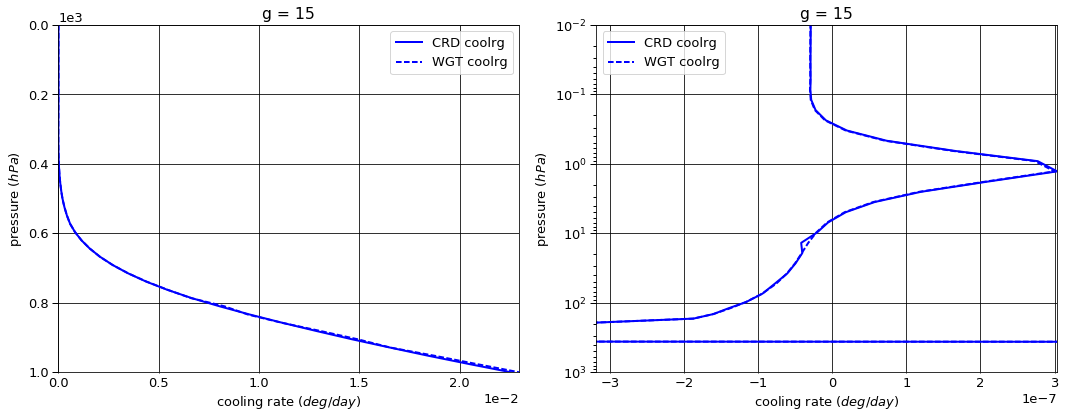

# Figure: cooling rate g-group 16

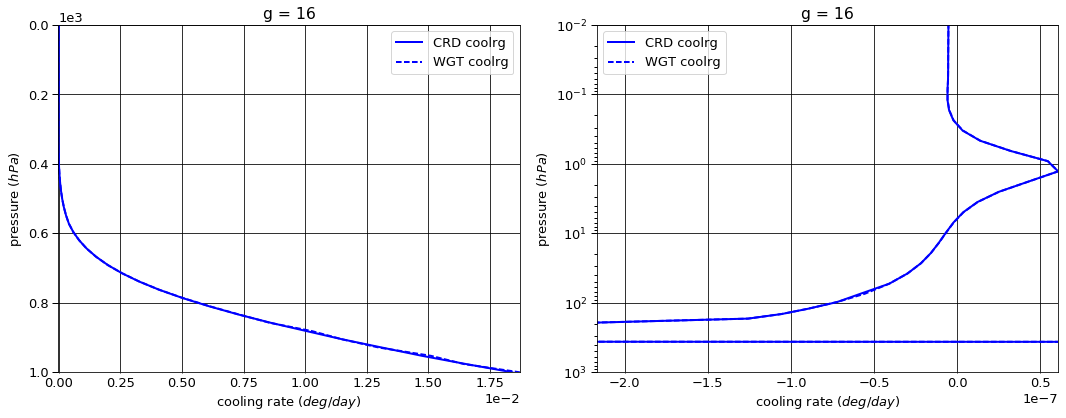

# Figure: cooling rate g-group 17

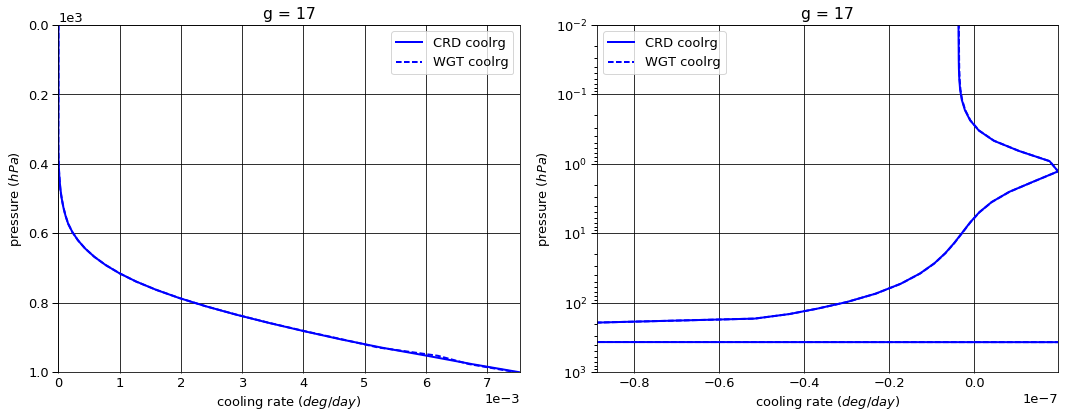

# Figure: cooling rate g-group 18

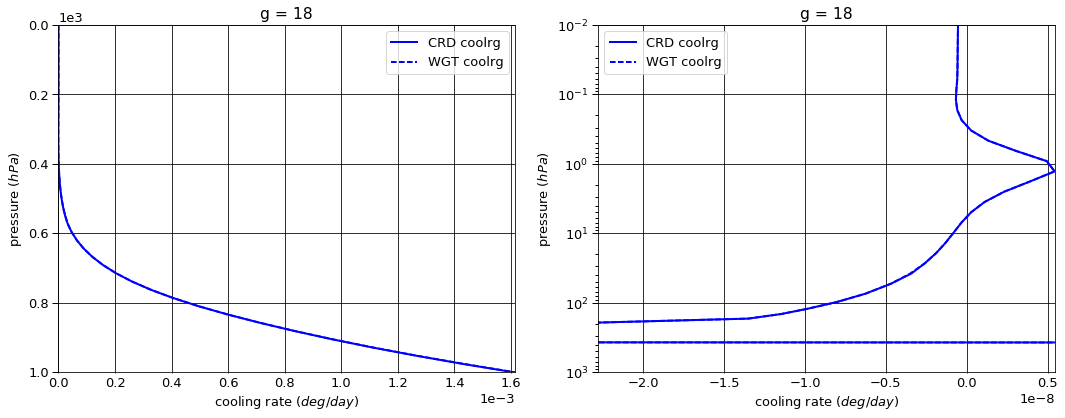

# Figure: cooling rate g-group total

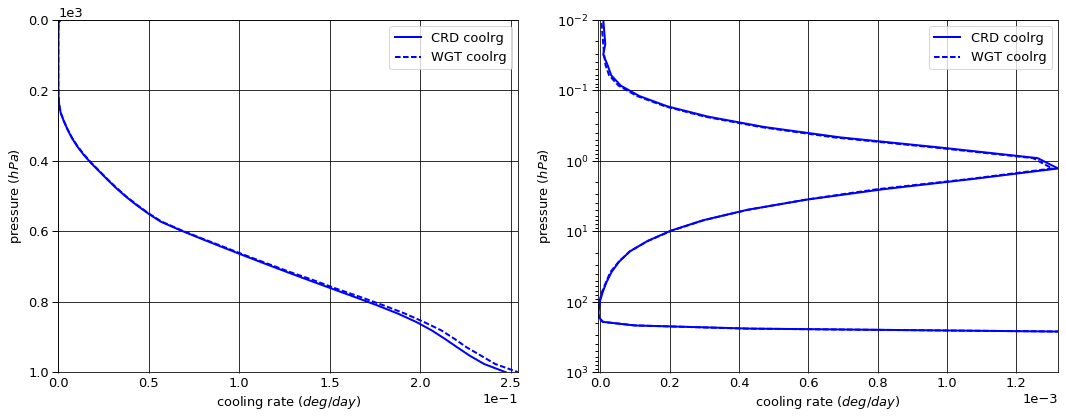

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.008791  0.000000 -0.008791
   1013.0   76    -0.018683  0.018673 -0.000011
2  0.0      1     -0.081747  0.000000 -0.081747
   1013.0   76    -0.166085  0.165878 -0.000207
3  0.0      1     -0.130945  0.000000 -0.130945
   1013.0   76    -0.236135  0.235674 -0.000461
4  0.0      1     -0.187188  0.000000 -0.187188
   1013.0   76    -0.305951  0.305037 -0.000914
5  0.0      1     -0.330099  0.000000 -0.330099
   1013.0   76    -0.503507  0.501007 -0.002500
6  0.0      1     -0.359926  0.000000 -0.359926
   1013.0   76    -0.507295  0.503473 -0.003822
7  0.0      1     -0.514552  0.000000 -0.514552
   1013.0   76    -0.677177  0.667551 -0.009627
8  0.0      1     -0.749312  0.000000 -0.749312
   1013.0   76    -0.930312  0.898317 -0.031995
9  0.0      1     -0.992570  0.000000 -0.992570
   1013.0   76    -1.164362  1.050960 -0.113402
10 0.0      1     -1.559251  0.000000 -1.559251
   1013.0   76    -1.745496  1.353753 -0.391743
11 0.0      1     -1.895541  0.000000 -1.895541
   1013.0   76    -2.045958  1.261055 -0.784903
12 0.0      1     -2.912274  0.000000 -2.912274
   1013.0   76    -3.061275  1.397017 -1.664258
13 0.0      1     -2.967042  0.000000 -2.967042
   1013.0   76    -3.061337  0.951154 -2.110183
14 0.0      1     -3.451360  0.000000 -3.451360
   1013.0   76    -3.517305  0.705480 -2.811826
15 0.0      1     -4.190294  0.000000 -4.190294
   1013.0   76    -4.236291  0.508517 -3.727774
16 0.0      1     -5.485148  0.000000 -5.485148
   1013.0   76    -5.519712  0.396875 -5.122837
17 0.0      1     -3.398186  0.000000 -3.398186
   1013.0   76    -3.411906  0.158950 -3.252956
18 0.0      1     -1.525882  0.000000 -1.525882
   1013.0   76    -1.528755  0.033291 -1.495464


WGT


flug      fldg     fnetg
g  pressure level                              
1  0.0      1     -0.008717  0.000000 -0.008717
   1013.0   76    -0.018683  0.018673 -0.000011
2  0.0      1     -0.081106  0.000000 -0.081106
   1013.0   76    -0.166085  0.165989 -0.000097
3  0.0      1     -0.130044  0.000000 -0.130044
   1013.0   76    -0.236135  0.235684 -0.000451
4  0.0      1     -0.186222  0.000000 -0.186222
   1013.0   76    -0.305951  0.305121 -0.000831
5  0.0      1     -0.328298  0.000000 -0.328298
   1013.0   76    -0.503507  0.501411 -0.002096
6  0.0      1     -0.358351  0.000000 -0.358351
   1013.0   76    -0.507295  0.504155 -0.003140
7  0.0      1     -0.512466  0.000000 -0.512466
   1013.0   76    -0.677177  0.670201 -0.006977
8  0.0      1     -0.746226  0.000000 -0.746226
   1013.0   76    -0.930312  0.907640 -0.022671
9  0.0      1     -0.989101  0.000000 -0.989101
   1013.0   76    -1.164362  1.075776 -0.088586
10 0.0      1     -1.554923  0.000000 -1.554923
   1013.0   76    -1.745496  1.404240 -0.341256
11 0.0      1     -1.892701  0.000000 -1.892701
   1013.0   76    -2.045958  1.302768 -0.743190
12 0.0      1     -2.910149  0.000000 -2.910149
   1013.0   76    -3.061275  1.432383 -1.628892
13 0.0      1     -2.965811  0.000000 -2.965811
   1013.0   76    -3.061337  0.975297 -2.086040
14 0.0      1     -3.450728  0.000000 -3.450728
   1013.0   76    -3.517305  0.717183 -2.800123
15 0.0      1     -4.190037  0.000000 -4.190037
   1013.0   76    -4.236291  0.513648 -3.722643
16 0.0      1     -5.485049  0.000000 -5.485049
   1013.0   76    -5.519712  0.398925 -5.120787
17 0.0      1     -3.398163  0.000000 -3.398163
   1013.0   76    -3.411906  0.159201 -3.252705
18 0.0      1     -1.525880  0.000000 -1.525880
   1013.0   76    -1.528755  0.033342 -1.495412


WGT - CRD


flug      fldg     fnetg
g  pressure level                              
1  0.0      1      0.000073  0.000000  0.000073
   1013.0   76     0.000000  0.000000  0.000000
2  0.0      1      0.000641  0.000000  0.000641
   1013.0   76     0.000000  0.000110  0.000110
3  0.0      1      0.000901  0.000000  0.000901
   1013.0   76     0.000000  0.000010  0.000010
4  0.0      1      0.000966  0.000000  0.000966
   1013.0   76     0.000000  0.000083  0.000083
5  0.0      1      0.001801  0.000000  0.001801
   1013.0   76     0.000000  0.000404  0.000404
6  0.0      1      0.001575  0.000000  0.001575
   1013.0   76     0.000000  0.000682  0.000682
7  0.0      1      0.002085  0.000000  0.002085
   1013.0   76     0.000000  0.002650  0.002650
8  0.0      1      0.003086  0.000000  0.003086
   1013.0   76     0.000000  0.009324  0.009324
9  0.0      1      0.003469  0.000000  0.003469
   1013.0   76     0.000000  0.024817  0.024817
10 0.0      1      0.004329  0.000000  0.004329
   1013.0   76     0.000000  0.050487  0.050487
11 0.0      1      0.002840  0.000000  0.002840
   1013.0   76     0.000000  0.041713  0.041713
12 0.0      1      0.002124  0.000000  0.002124
   1013.0   76     0.000000  0.035366  0.035366
13 0.0      1      0.001231  0.000000  0.001231
   1013.0   76     0.000000  0.024142  0.024142
14 0.0      1      0.000632  0.000000  0.000632
   1013.0   76     0.000000  0.011703  0.011703
15 0.0      1      0.000257  0.000000  0.000257
   1013.0   76     0.000000  0.005131  0.005131
16 0.0      1      0.000099  0.000000  0.000099
   1013.0   76     0.000000  0.002050  0.002050
17 0.0      1      0.000023  0.000000  0.000023
   1013.0   76     0.000000  0.000251  0.000251
18 0.0      1      0.000002  0.000000  0.000002
   1013.0   76     0.000000  0.000051  0.000051

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer              
1  0.000312    1      2.924403e-07
   1001.112500 75     3.819995e-06
2  0.000312    1     -1.900401e-06
   1001.112500 75     8.389391e-05
3  0.000312    1     -4.785286e-07
   1001.112500 75     1.746225e-04
4  0.000312    1     -1.123759e-06
   1001.112500 75     3.358588e-04
5  0.000312    1     -3.778184e-06
   1001.112500 75     8.068934e-04
6  0.000312    1     -1.203945e-07
   1001.112500 75     1.099500e-03
7  0.000312    1     -1.782925e-07
   1001.112500 75     2.286682e-03
8  0.000312    1     -6.979738e-09
   1001.112500 75     5.583616e-03
9  0.000312    1     -9.394127e-08
   1001.112500 75     1.271553e-02
10 0.000312    1     -2.841609e-07
   1001.112500 75     2.684598e-02
11 0.000312    1     -7.228907e-08
   1001.112500 75     3.446558e-02
12 0.000312    1     -1.586637e-07
   1001.112500 75     4.705436e-02
13 0.000312    1     -6.563055e-08
   1001.112500 75     3.630102e-02
14 0.000312    1     -2.288754e-08
   1001.112500 75     2.952136e-02
15 0.000312    1     -2.784690e-08
   1001.112500 75     2.256743e-02
16 0.000312    1     -4.767236e-09
   1001.112500 75     1.840275e-02
17 0.000312    1     -3.854617e-09
   1001.112500 75     7.535709e-03
18 0.000312    1     -4.743220e-10
   1001.112500 75     1.609980e-03


WGT


coolrg
g  pressure    layer              
1  0.000312    1      2.240860e-07
   1001.112500 75     3.819995e-06
2  0.000312    1     -4.559778e-06
   1001.112500 75     3.483438e-05
3  0.000312    1     -6.559723e-07
   1001.112500 75     1.712076e-04
4  0.000312    1     -1.933440e-06
   1001.112500 75     3.133185e-04
5  0.000312    1     -5.390358e-06
   1001.112500 75     7.488964e-04
6  0.000312    1     -1.425908e-07
   1001.112500 75     1.012209e-03
7  0.000312    1     -2.368413e-07
   1001.112500 75     1.884823e-03
8  0.000312    1     -8.369682e-09
   1001.112500 75     4.880205e-03
9  0.000312    1     -8.617050e-08
   1001.112500 75     1.223271e-02
10 0.000312    1     -3.015337e-07
   1001.112500 75     2.827923e-02
11 0.000312    1     -7.391918e-08
   1001.112500 75     3.631591e-02
12 0.000312    1     -1.486849e-07
   1001.112500 75     4.915809e-02
13 0.000312    1     -6.760589e-08
   1001.112500 75     3.803402e-02
14 0.000312    1     -2.318774e-08
   1001.112500 75     3.040978e-02
15 0.000312    1     -2.824317e-08
   1001.112500 75     2.297794e-02
16 0.000312    1     -4.767236e-09
   1001.112500 75     1.870686e-02
17 0.000312    1     -3.782568e-09
   1001.112500 75     7.482510e-03
18 0.000312    1     -4.773240e-10
   1001.112500 75     1.614577e-03


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -6.835429e-08
   1001.112500 75     0.000000e+00
2  0.000312    1     -2.659377e-06
   1001.112500 75    -4.905953e-05
3  0.000312    1     -1.774437e-07
   1001.112500 75    -3.414970e-06
4  0.000312    1     -8.096811e-07
   1001.112500 75    -2.254031e-05
5  0.000312    1     -1.612174e-06
   1001.112500 75    -5.799699e-05
6  0.000312    1     -2.219632e-08
   1001.112500 75    -8.729040e-05
7  0.000312    1     -5.854875e-08
   1001.112500 75    -4.018594e-04
8  0.000312    1     -1.389943e-09
   1001.112500 75    -7.034104e-04
9  0.000312    1      7.770776e-09
   1001.112500 75    -4.828240e-04
10 0.000312    1     -1.737279e-08
   1001.112500 75     1.433248e-03
11 0.000312    1     -1.630107e-09
   1001.112500 75     1.850332e-03
12 0.000312    1      9.978780e-09
   1001.112500 75     2.103731e-03
13 0.000312    1     -1.975341e-09
   1001.112500 75     1.733000e-03
14 0.000312    1     -3.002040e-10
   1001.112500 75     8.884180e-04
15 0.000312    1     -3.962690e-10
   1001.112500 75     4.105110e-04
16 0.000312    1      0.000000e+00
   1001.112500 75     3.041120e-04
17 0.000312    1      7.204890e-11
   1001.112500 75    -5.319860e-05
18 0.000312    1     -3.002040e-12
   1001.112500 75     4.597600e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.740107,0.000000,-30.740107
1013.0,76,-32.637543,11.112663,-21.524880



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-30.713972,0.000000,-30.713972
1013.0,76,-32.637543,11.321636,-21.315906



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.026135,0.000000,0.026135
1013.0,76,0.000000,0.208974,0.208974


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000008
1001.112500,75,0.247395



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.000013
1001.112500,75,0.254261



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000005
1001.112500,75,0.006866


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.000562,0.000580
2,0.005125,0.005066
3,0.007250,0.007227
4,0.009375,0.009377
5,0.015500,0.015376
6,0.015625,0.015483
7,0.020813,0.020702
8,0.028625,0.028419
9,0.035750,0.035616


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,5.708826e-22
2,3.240562e-22
3,1.839474e-22
4,1.044160e-22
5,5.927078e-23
6,3.364450e-23
7,1.909798e-23
8,1.084079e-23
9,6.153673e-24


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [18]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,5.708826e-22,NaN,0.000562,0.000580,0.000562,0.000580,600.0
2,3.240562e-22,0.567641,0.005125,0.005066,0.005687,0.005646,600.0
3,1.839474e-22,0.567641,0.007250,0.007227,0.012938,0.012873,600.0
4,1.044160e-22,0.567641,0.009375,0.009377,0.022312,0.022250,600.0
5,5.927078e-23,0.567641,0.015500,0.015376,0.037812,0.037626,600.0
6,3.364450e-23,0.567641,0.015625,0.015483,0.053437,0.053108,600.0
7,1.909798e-23,0.567641,0.020813,0.020702,0.074250,0.073811,600.0
8,1.084079e-23,0.567641,0.028625,0.028419,0.102875,0.102229,600.0
9,6.153673e-24,0.567641,0.035750,0.035616,0.138625,0.137845,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                     
1     1      0.000312  3.710198e-22  8.348400e-23   4.444202
      2      0.000312  6.346999e-22  2.909183e-23  21.817124
      3      0.000312  1.613847e-23  2.870186e-24   5.622797
      4      0.000312  2.132507e-23  2.295451e-24   9.290144
      5      0.000312  2.693567e-23  1.013362e-24  26.580498
      6      0.000312  5.394710e-25  2.585152e-25   2.086806
      7      0.000312  5.538413e-25  7.809107e-26   7.092249
      8      0.000312  1.220766e-26  9.520006e-27   1.282317
      9      0.000312  8.808034e-26  2.972643e-26   2.963032
      10     0.000312  1.836501e-25  9.779258e-27  18.779554
      11     0.000312  3.516470e-26  9.008435e-27   3.903530
      12     0.000312  4.404517e-26  4.823689e-27   9.131014
      13     0.000312  1.923735e-26  3.860309e-27   4.983372
      14     0.000312  5.562612e-27  1.407316e-27   3.952637
      15     0.000312  5.475835e-27  9.346354e-28   5.858793
      16     0.000312  7.050589e-28  2.153661e-28   3.273769
      17     0.000312  8.843323e-28  1.001112e-28   8.833497
      18     0.000312  2.442969e-28  1.165459e-28   2.096143
2     1      0.000750  3.757251e-22  8.373882e-23   4.486869
      2      0.000750  6.381389e-22  2.914255e-23  21.897149
      3      0.000750  1.632193e-23  2.877956e-24   5.671362
      4      0.000750  2.152582e-23  2.296832e-24   9.371962
      5      0.000750  2.702760e-23  1.015255e-24  26.621484
      6      0.000750  5.474731e-25  2.598808e-25   2.106632
      7      0.000750  5.620636e-25  7.833552e-26   7.175079
      8      0.000750  1.247916e-26  9.682434e-27   1.288846
      9      0.000750  8.891071e-26  2.987448e-26   2.976142
      10     0.000750  1.848511e-25  9.795532e-27  18.870956
      11     0.000750  3.555120e-26  9.048407e-27   3.929000
      12     0.000750  4.431656e-26  4.846582e-27   9.143879
      13     0.000750  1.940540e-26  3.868889e-27   5.015754
      14     0.000750  5.627127e-27  1.416769e-27   3.971802
      15     0.000750  5.515450e-27  9.402322e-28   5.866051
      16     0.000750  7.119927e-28  2.164181e-28   3.289894
      17     0.000750  8.874407e-28  1.007418e-28   8.809065
      18     0.000750  2.473037e-28  1.172763e-28   2.108727
3     1      0.001052  3.858743e-22  8.427232e-23   4.578898
      2      0.001052  6.454992e-22  2.924363e-23  22.073155
      3      0.001052  1.671663e-23  2.893493e-24   5.777319
      4      0.001052  2.195690e-23  2.299597e-24   9.548149
      5      0.001052  2.722561e-23  1.019065e-24  26.716263
      6      0.001052  5.647659e-25  2.626881e-25   2.149949
      7      0.001052  5.798878e-25  7.884887e-26   7.354422
      8      0.001052  1.306706e-26  1.002531e-26   1.303406
      9      0.001052  9.068960e-26  3.017988e-26   3.004969
      10     0.001052  1.874223e-25  9.826800e-27  19.072570
      11     0.001052  3.638284e-26  9.131252e-27   3.984431
      12     0.001052  4.489749e-26  4.894763e-27   9.172555
      13     0.001052  1.976671e-26  3.886126e-27   5.086483
      14     0.001052  5.766007e-27  1.436517e-27   4.013879
      15     0.001052  5.600759e-27  9.519480e-28   5.883471
      16     0.001052  7.268842e-28  2.185906e-28   3.325323
      17     0.001052  8.940880e-28  1.020474e-28   8.761499
      18     0.001052  2.537575e-28  1.187843e-28   2.136288
4     1      0.001476  3.968791e-22  8.484703e-23   4.677584
      2      0.001476  6.533595e-22  2.935267e-23  22.258944
      3      0.001476  1.714367e-23  2.909626e-24   5.892053
      4      0.001476  2.242127e-23  2.302708e-24   9.736915
      5      0.001476  2.743824e-23  1.023231e-24  26.815281
      6      0.001476  5.836314e-25  2.655815e-25   2.197560
      7      0.001476  5.993037e-25  7.941299e-26   7.546671
      8      0.001476  1.371825e-26  1.039586e-26   1.319588
      9      0.001476  9.262226e-26  3.049926e-26   3.036869
      10     0.001476  1.901720e-25  9.861527e-2

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
